In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from independence import *
from pre_process import *
import warnings
warnings.simplefilter("ignore")

C:\Users\maaya\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### Data Loadig & Processing

In [2]:
df = data_processing("data/NCDOT_BikePedCrash.csv")
features_df = features_engineer("data/NCDOT_BikePedCrash.csv")

In [3]:
df.head()

,age_category,is_drunk_biker,biker_location,gender,intersection_type,month,severity,is_drunk_driver,vehicle_type,y,light_condition,locality,x,road_condition,road_surface_type,speed_limit,weather
0,11-15,No,Sidewalk / Crosswalk / Driveway Crossing,Male,Non-Intersection,January,B: Suspected Minor Injury,No,Passenger Vehicle,36.039490,Daylight,Urban (>70% Developed),-78.883896,Dry,Smooth Asphalt,30 - 35 MPH,Clear
1,20-24,No,Sidewalk / Crosswalk / Driveway Crossing,Male,Intersection,January,C: Possible Injury,No,Passenger Vehicle,35.751118,Daylight,Urban (>70% Developed),-78.782800,Dry,Smooth Asphalt,30 - 35 MPH,Clear
2,30-39,No,Non-Roadway,Male,Non-Roadway,January,B: Suspected Minor Injury,No,Passenger Vehicle,35.084732,Daylight,Urban (>70% Developed),-80.697820,Dry,Smooth Asphalt,20 - 25 MPH,Cloudy
3,30-39,No,Travel Lane,Male,Intersection,January,C: Possible Injury,No,Passenger Vehicle,35.684400,Daylight,Urban (>70% Developed),-80.479320,Dry,Smooth Asphalt,30 - 35 MPH,Cloudy
4,40-49,No,Travel Lane,Male,Non-Intersection,January,B: Suspected Minor Injury,No,Light Truck,34.999428,Daylight,Urban (>70% Developed),-78.904450,Dry,Coarse Asphalt,30 - 35 MPH,Clear


In [4]:
features_df

,age_category,is_drunk_biker,month,severity,is_drunk_driver,y,x,speed_limit,is_wet,is_male,...,light_condition_Daylight,locality_Mixed (30% To 70% Developed),locality_Rural (<30% Developed),locality_Urban (>70% Developed),road_surface_type_Coarse Asphalt,road_surface_type_Concrete,road_surface_type_Smooth Asphalt,weather_Clear,weather_Cloudy,weather_Rain
0,11,0,1,2,0,36.039490,-78.883896,30,0,1,...,1,0,0,1,0,0,1,1,0,0
1,20,0,1,1,0,35.751118,-78.782800,30,0,1,...,1,0,0,1,0,0,1,1,0,0
2,30,0,1,2,0,35.084732,-80.697820,20,0,1,...,1,0,0,1,0,0,1,0,1,0
3,30,0,1,1,0,35.684400,-80.479320,30,0,1,...,1,0,0,1,0,0,1,0,1,0
4,40,0,1,2,0,34.999428,-78.904450,30,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252,6,0,9,1,0,35.270257,-77.585864,30,0,0,...,1,0,0,1,1,0,0,1,0,0
11253,60,0,12,3,0,35.534234,-77.025772,30,0,0,...,1,0,0,1,1,0,0,1,0,0
11255,30,0,12,2,0,35.118065,-77.077608,30,0,1,...,1,0,0,1,0,0,1,1,0,0
11256,50,0,12,0,0,35.718750,-78.624247,30,0,1,...,1,0,0,1,1,0,0,1,0,0


### EDA

In [10]:
def plot_categorical_distribution(df, column, palette='Set2', stat="count", hue=None, figsize=(6,5)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column, palette=palette, stat=stat, hue=hue)
    plt.title(f'{column} Distribution')
    plt.show()

C:\Users\maaya\AppData\Local\Temp\ipykernel_29164\1445388020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=palette, stat=stat, hue=hue)


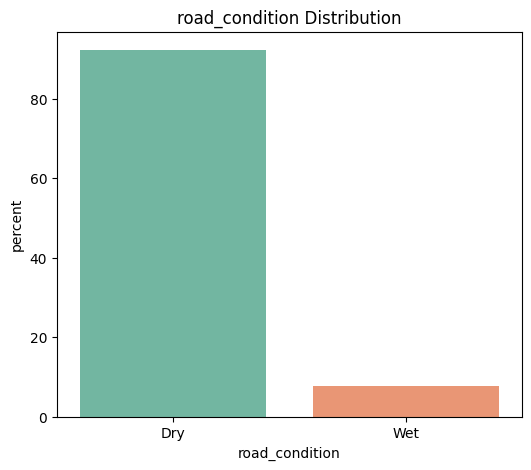

In [50]:
plot_categorical_distribution(df, 'road_condition', stat="percent")

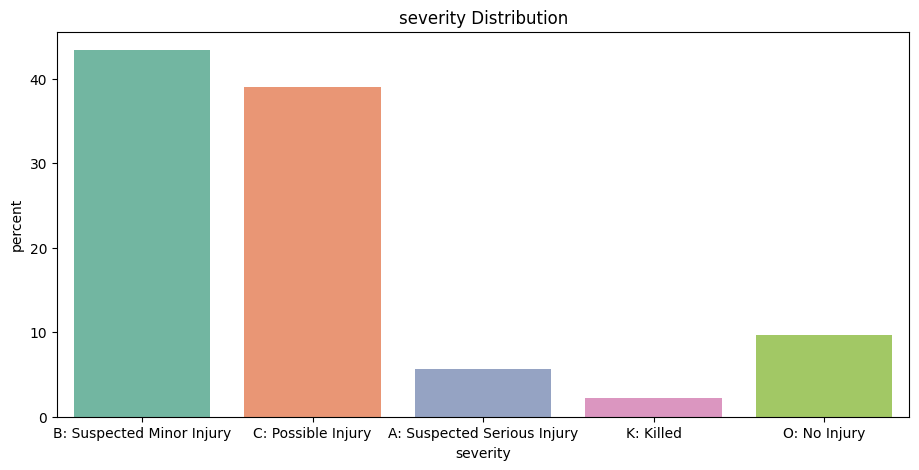

In [14]:
plot_categorical_distribution(df, Y, stat="percent", figsize=(11,5))

C:\Users\maaya\AppData\Local\Temp\ipykernel_29164\1445388020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette=palette, stat=stat, hue=hue)


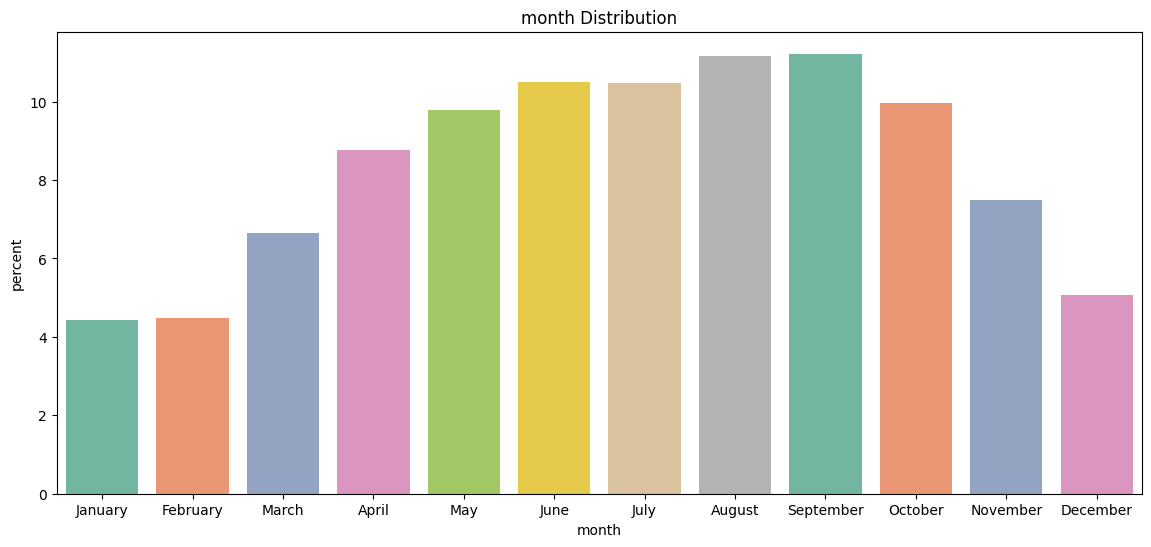

In [65]:
plot_categorical_distribution(df, 'month', stat="percent",  figsize=(14,6))

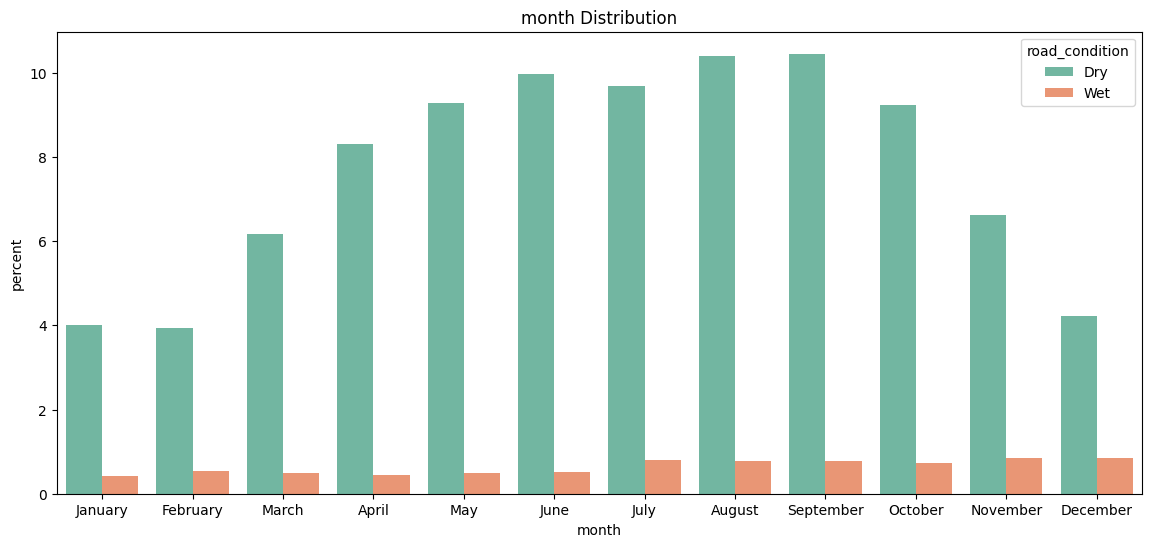

In [58]:
plot_categorical_distribution(df, 'month', stat="percent", hue='road_condition', figsize=(14,6))

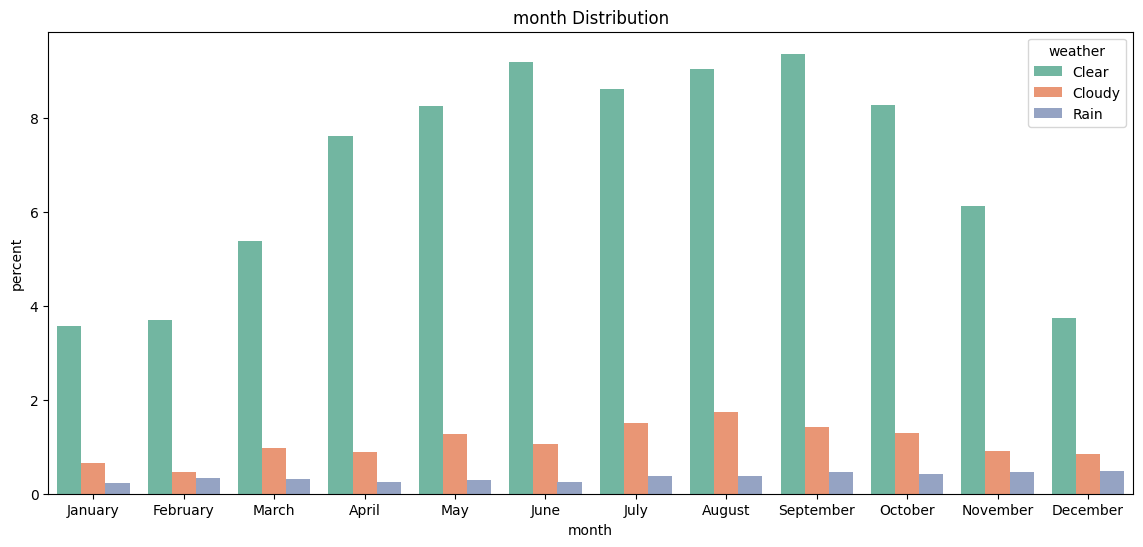

In [52]:
plot_categorical_distribution(df, 'month', stat="percent", hue='weather', figsize=(14,6))

In [5]:
dist_by_t, chi_by_t = print_independence_table(df, seperator_col=T)
dist_by_y, chi_by_y = print_independence_table(df, seperator_col=Y)

In [6]:
chi_by_t

,,Chi Square,p value
is_drunk_biker,is_drunk_biker,10.80,<0.05
biker_location,biker_location,7.03,0.071
gender,gender,8.38,<0.05
intersection_type,intersection_type,5.54,0.136
month,month,97.63,<0.05
is_drunk_driver,is_drunk_driver,0.20,0.657
vehicle_type,vehicle_type,5.69,0.128
light_condition,light_condition,209.71,<0.05
locality,locality,0.65,0.723
road_surface_type,road_surface_type,0.39,0.822


In [7]:
dist_by_t

value          \
road_condition                                                Dry           
variable                                                        %     No.   
is_drunk_biker    No                                        94.42  7102.0   
                  Yes                                        5.58   420.0   
biker_location    Bike Lane / Paved Shoulder                 7.23   544.0   
                  Non-Roadway                                7.95   598.0   
                  Sidewalk / Crosswalk / Driveway Crossing  18.68  1405.0   
                  Travel Lane                               66.14  4975.0   
gender            Female                                    15.63  1176.0   
                  Male                                      84.37  6346.0   
intersection_type Intersection                              46.60  3505.0   
                  Intersection-Related                       5.88   442.0   
                  Non-Intersection                          44.35  3336.0   
                  Non-Roadway                                3.18   239.0   
month             April                                      9.01   678.0   
                  August                                    11.26   847.0   
                  December                                   4.57   344.0   
                  February                                   4.27   321.0   
                  January                                    4.33   326.0   
                  July                                      10.49   789.0   
                  June                                      10.81   813.0   
                  March                                      6.67   502.0   
                  May                                       10.06   757.0   
                  November                                   7.18   540.0   
                  October                                   10.01   753.0   
                  September                                 11.33   852.0   
is_drunk_driver   No                                        98.42  7403.0   
                  Yes                                        1.58   119.0   
vehicle_type      Heavy Truck                                2.13   160.0   
                  Light Truck                               21.34  1605.0   
                  Passenger Vehicle                         75.87  5707.0   
                  Two-Wheeler                                0.66    50.0   
light_condition   Dark - Lighted Roadway                     9.37   705.0   
                  Dark - Roadway Not Lighted                 7.98   600.0   
                  Daylight                                  82.65  6217.0   
locality          Mixed (30% To 70% Developed)              14.20  1068.0   
                  Rural (<30% Developed)                    15.49  1165.0   
                  Urban (>70% Developed)                    70.31  5289.0   
road_surface_type Coarse Asphalt                            33.22  2499.0   
                  Concrete                                   2.55   192.0   
                  Smooth Asphalt                            64.22  4831.0   
weather           Clear                                     89.17  6707.0   
                  Cloudy                                    10.78   811.0   
                  Rain                                       0.05     4.0   

                                                                          
road_condition                                                Wet         
variable                                                        %    No.  
is_drunk_biker    No                                        91.14  576.0  
                  Yes                                        8.86   56.0  
biker_location    Bike Lane / Paved Shoulder                 5.38   34.0  
                  Non-Roadway                                6.49   41.0  
                  Sidewalk / Crosswalk / Driveway Crossing  17.25  10

In [8]:
chi_by_y

,,Chi Square,p value
is_drunk_biker,is_drunk_biker,127.88,<0.05
biker_location,biker_location,225.76,<0.05
gender,gender,17.41,<0.05
intersection_type,intersection_type,171.07,<0.05
month,month,99.34,<0.05
is_drunk_driver,is_drunk_driver,98.34,<0.05
vehicle_type,vehicle_type,62.54,<0.05
light_condition,light_condition,229.72,<0.05
locality,locality,274.93,<0.05
road_surface_type,road_surface_type,6.57,0.584


In [9]:
dist_by_y

value  \
severity                                                   A: Suspected Serious Injury   
variable                                                                             %   
is_drunk_biker    No                                                             87.80   
                  Yes                                                            12.20   
biker_location    Bike Lane / Paved Shoulder                                      8.28   
                  Non-Roadway                                                     6.75   
                  Sidewalk / Crosswalk / Driveway Crossing                        5.88   
                  Travel Lane                                                    79.08   
gender            Female                                                         16.56   
                  Male                                                           83.44   
intersection_type Intersection                                                   35.95   
                  Intersection-Related                                            5.88   
                  Non-Intersection                                               57.08   
                  Non-Roadway                                                     1.09   
month             April                                                          11.98   
                  August                                                         11.33   
                  December                                                        6.54   
                  February                                                        3.70   
                  January                                                         3.27   
                  July                                                           12.42   
                  June                                                            9.15   
                  March                                                           8.06   
                  May                                                             8.93   
                  November                                                        5.66   
                  October                                                        10.24   
                  September                                                       8.71   
is_drunk_driver   No                                                             96.51   
                  Yes                                                             3.49   
vehicle_type      Heavy Truck                                                     2.40   
                  Light Truck                                                    25.05   
                  Passenger Vehicle                                              71.90   
                  Two-Wheeler                                                     0.65   
light_condition   Dark - Lighted Roadway                                         11.55   
                  Dark - Roadway Not Lighted                                     15.47   
                  Daylight                                                       72.98   
locality          Mixed (30% To 70% Developed)                                   18.08   
                  Rural (<30% Developed)                                         32.46   
                  Urban (>70% Developed)                                         49.46   
road_surface_type Coarse Asphalt                                                 34.86   
                  Concrete                                                        1.96   
                  Smooth Asphalt                                                 63.18   
weather           Clear                                                          82.14   
                  Cloudy                                                         13.73   
                  Rain                                                            4.14   

                              